# Fuel Cosumption Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

!pip install mlxtend --upgrade
from mlxtend.evaluate import bias_variance_decomp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.3 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


## A) Dataset Information

In [2]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   Brands                    1067 non-null   object 
 2   VEHICLECLASS              1067 non-null   object 
 3   ENGINESIZE                1067 non-null   float64
 4   CYLINDERS                 1067 non-null   int64  
 5   TRANSMISSION              1067 non-null   object 
 6   FUELTYPE                  1067 non-null   object 
 7   FUELCONSUMPTION_CITY      1067 non-null   float64
 8   FUELCONSUMPTION_HWY       1067 non-null   float64
 9   FUELCONSUMPTION_COMB      1067 non-null   float64
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 100.2+ KB


In [4]:
df.isna().sum()

MODELYEAR                   0
Brands                      0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [5]:
df.duplicated().sum()

115

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
df.shape

(952, 12)

## Comments
*The dataset consisits of 12 columns and 952 rows.

*The are no NaN objects.

*There are 115 duplicated items (Removed)

*Numerical Columns:

MODELYEAR - ENINESIZE - CYLINDERS - FUELCONSUMPTION_CITY - FUELCONSUMPTION_HWY - FUELCONSUMPTION_COMB - FUELCONSUMPTION_COMB_MPG - CO2EMISSIONS

*Non-Numerical Columns:

Brands - VEHICLECLASS - TRANSMISSION - FUELTYPE

## ----------------------------------------------------------------------------------------------------------------------------------------------------------------

## B) Data Visualization

[Text(0.5, 1.0, 'Outliers: Engine Size')]

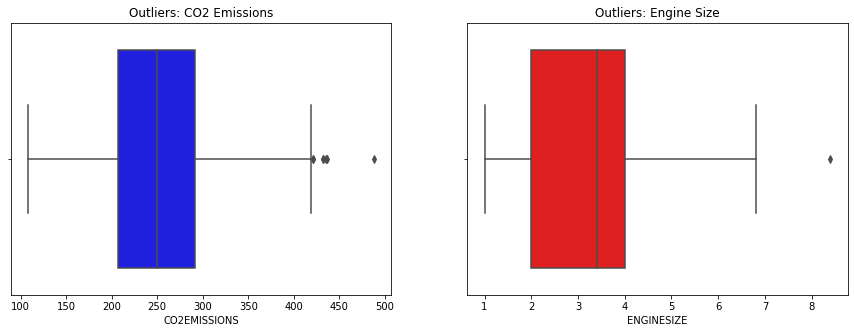

In [8]:
# detecting the outliers
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,5)

sns.boxplot(x='CO2EMISSIONS', data=df, color='blue',ax=axes[0]).set(title='Outliers: CO2 Emissions')
sns.boxplot(x='ENGINESIZE', data=df, color='red',ax=axes[1]).set(title='Outliers: Engine Size')

In [9]:
#High CO2 Emissions
df[df['CO2EMISSIONS']>450]

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
349,2014,FORD,VAN_PASSENGER,6.8,10,A5,X,23.9,17.8,21.2,13,488


In [10]:
#Large Engine Size
df[df['ENGINESIZE']>7]

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
940,2014,SRT,TWO-SEATER,8.4,10,M6,Z,20.0,13.0,16.9,17,389


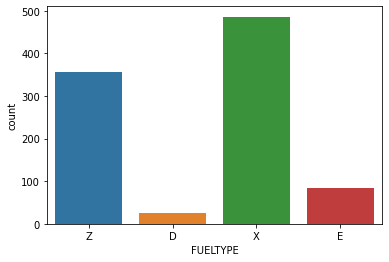

In [11]:
#Differentiating between fuel types
sns.countplot(x='FUELTYPE',data=df)

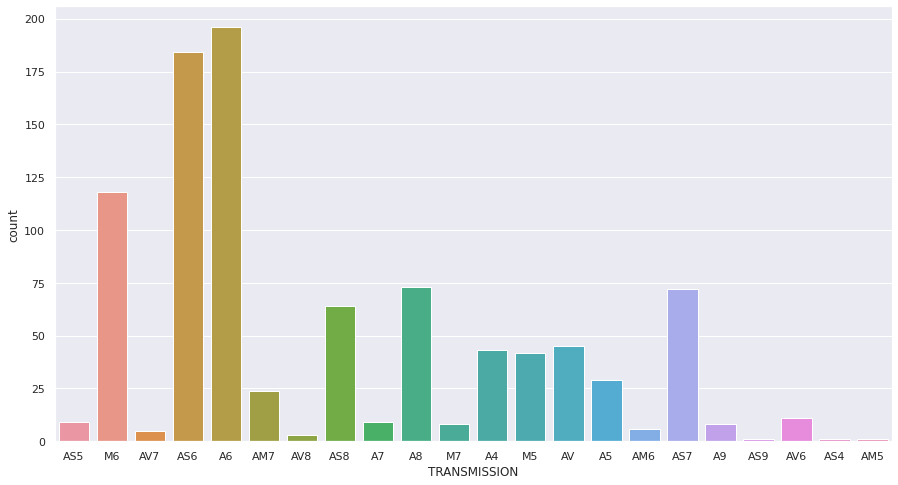

In [12]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(data=df,x='TRANSMISSION')

In [13]:
# Correlation between dataset columns
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934377,0.825390,0.772854,0.812729,-0.798210,0.869835
CYLINDERS,NaN,0.934377,1.000000,0.788633,0.719775,0.769732,-0.759572,0.843533
FUELCONSUMPTION_CITY,NaN,0.825390,0.788633,1.000000,0.965839,0.995497,-0.932580,0.897429
FUELCONSUMPTION_HWY,NaN,0.772854,0.719775,0.965839,1.000000,0.985961,-0.888966,0.860853
FUELCONSUMPTION_COMB,NaN,0.812729,0.769732,0.995497,0.985961,1.000000,-0.924140,0.891306
FUELCONSUMPTION_COMB_MPG,NaN,-0.798210,-0.759572,-0.932580,-0.888966,-0.924140,1.000000,-0.903649
CO2EMISSIONS,NaN,0.869835,0.843533,0.897429,0.860853,0.891306,-0.903649,1.000000


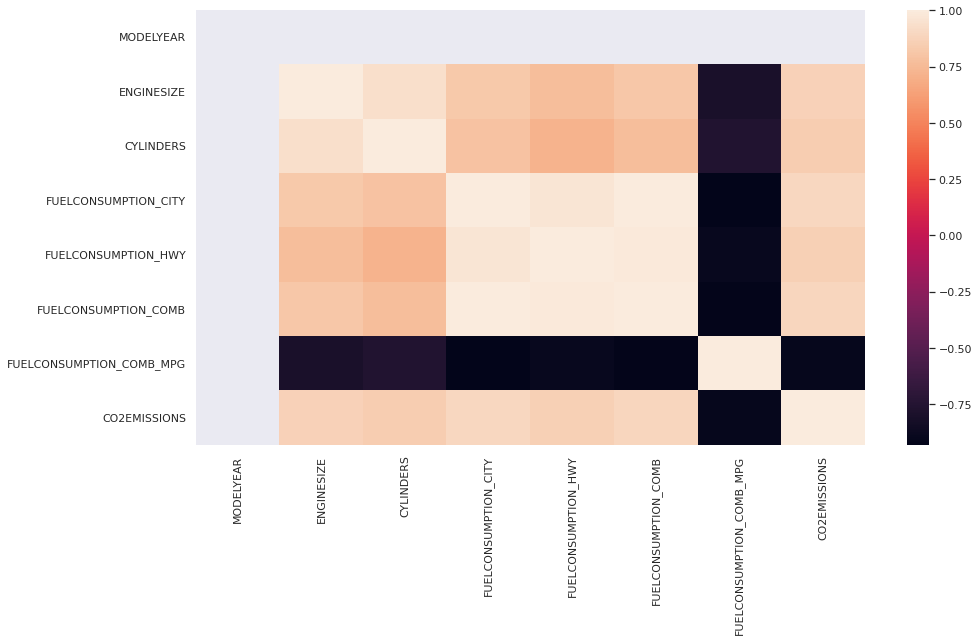

In [14]:
#Visualizing the correlation between the features:
sns.heatmap(df.corr())

In [15]:
# Dropping Model Year (Constant throughout dataset)
df.drop("MODELYEAR", axis=1, inplace=True)
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934377,0.825390,0.772854,0.812729,-0.798210,0.869835
CYLINDERS,0.934377,1.000000,0.788633,0.719775,0.769732,-0.759572,0.843533
FUELCONSUMPTION_CITY,0.825390,0.788633,1.000000,0.965839,0.995497,-0.932580,0.897429
FUELCONSUMPTION_HWY,0.772854,0.719775,0.965839,1.000000,0.985961,-0.888966,0.860853
FUELCONSUMPTION_COMB,0.812729,0.769732,0.995497,0.985961,1.000000,-0.924140,0.891306
FUELCONSUMPTION_COMB_MPG,-0.798210,-0.759572,-0.932580,-0.888966,-0.924140,1.000000,-0.903649
CO2EMISSIONS,0.869835,0.843533,0.897429,0.860853,0.891306,-0.903649,1.000000


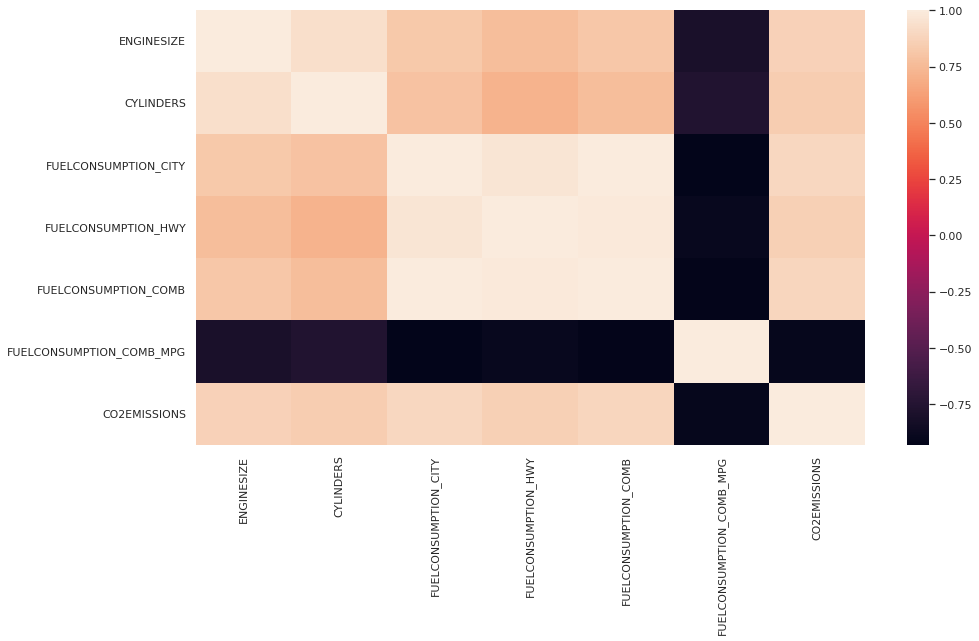

In [16]:
#Visualizing the correlation between the features:
sns.heatmap(df.corr())

#Most Features all correlated (Only Numerical Features -> Later we will visualize all features)

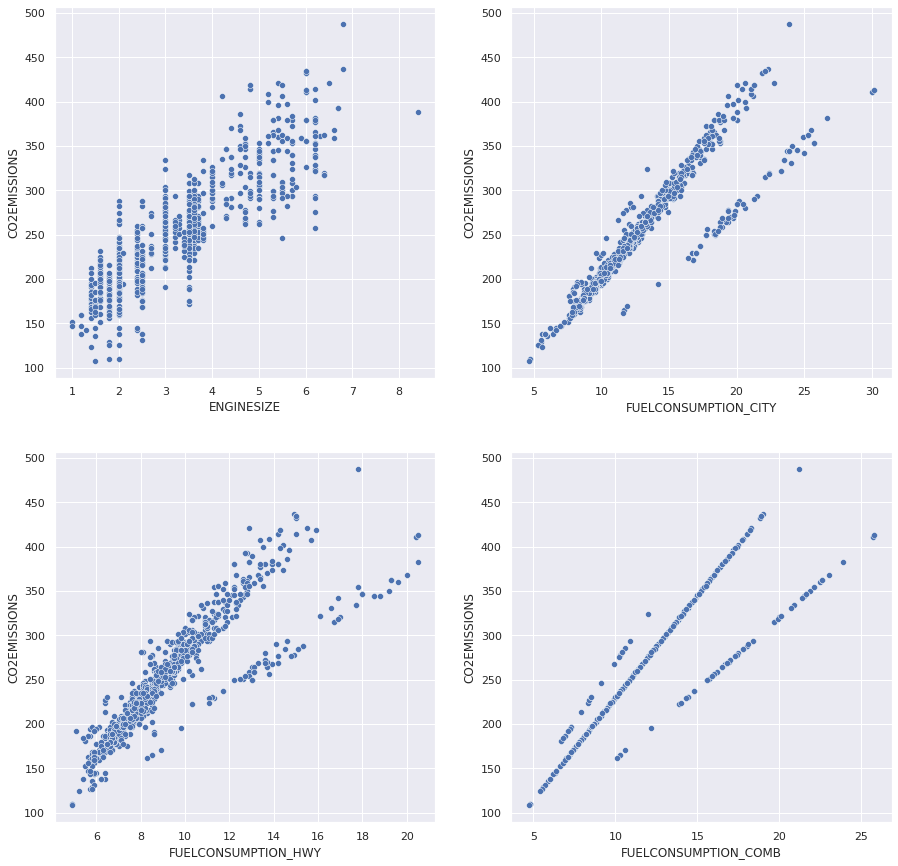

In [17]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15,15)

sns.scatterplot(x='ENGINESIZE',y='CO2EMISSIONS',data=df,ax=axes[0,0])
sns.scatterplot(x='FUELCONSUMPTION_CITY',y='CO2EMISSIONS',data=df,ax=axes[0,1])
sns.scatterplot(x='FUELCONSUMPTION_HWY',y='CO2EMISSIONS',data=df,ax=axes[1,0])
sns.scatterplot(x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS',data=df,ax=axes[1,1])

# All 4 features can be trained using linear regression

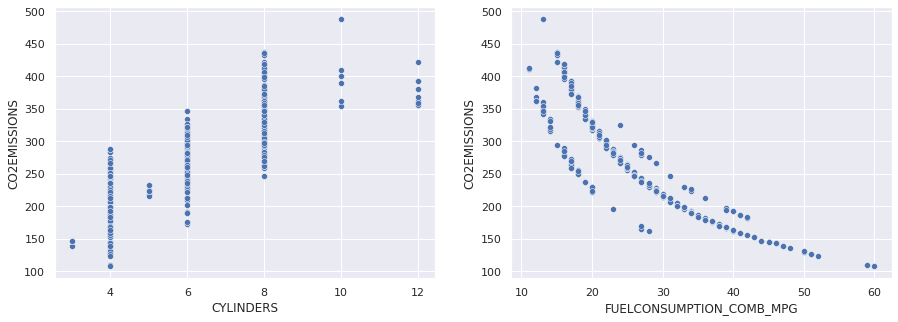

In [19]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,5)

sns.scatterplot(x='CYLINDERS',y='CO2EMISSIONS',data=df,ax=axes[0])

sns.scatterplot(x='FUELCONSUMPTION_COMB_MPG',y='CO2EMISSIONS',data=df,ax=axes[1])

# Non linear Features (Cylinders Features can be fitted with a linear curve)

## Comments
*First Column "MODELYEAR" will be igonred 

*All numerical features have high correlation with output.

*Not all featurs can be fitted with linear regression. 

So we will try to increase model complexity by increasing degree (Polynomial regression)

## ----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Machine Learning 

In [20]:
# split into training and testing sets (First: Including 4 linear featured)
x=df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']].values
y=df['CO2EMISSIONS'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [21]:
# Multi variable linear regression
model_multi = linear_model.LinearRegression()

model_multi.fit(x_train,y_train)

model_multi.predict([[4,15,10,15]])

array([356.24568808])

In [22]:
# Print intercept and coefficients 
print("A0 = ",model_multi.intercept_)
print("A1 = ",model_multi.coef_)

A0 =  78.09742927609585
A1 =  [ 18.58463066  -9.8967513  -13.58609616  32.54146448]


In [23]:
# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model_multi, x_train, y_train, x_test, y_test, loss='mse', num_rounds=4, random_seed=43)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

#High bias and variance (We will add more features)

Average Expected Loss: 640.1222
Average Bias: 631.3176
Average Variance: 8.8047


In [24]:
# Evaluating Model by calculating Errors
y_pred = model_multi.predict(x_test)

MSE = mean_squared_error(y_test,y_pred)
print('mean_squared_error',MSE)

RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)

r_score = r2_score(y_test,y_pred)
print('r_score',r_score)

MAE= mean_absolute_error(y_test,y_pred)

print('mean_absolute_error',MAE)

mean_squared_error 637.9276124829504
Root_mean_squared_error 25.25722891536105
r_score 0.8473115521446736
mean_absolute_error 17.664584159562402


In [25]:
# Adding another feature
# split into training and testing sets
x2=df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CYLINDERS']].values
y2=df['CO2EMISSIONS'].values
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, random_state=1)

# Multi variable linear regression
new_model = linear_model.LinearRegression()
new_model.fit(x_train2,y_train2)
print('Prediction= ',new_model.predict([[4,15,10,15,6]]))

# Print intercept and coefficients 
print("A0 = ",new_model.intercept_)
print("A1 = ",new_model.coef_)

# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(new_model, x_train2, y_train2, x_test2, y_test2, loss='mse', num_rounds=4, random_seed=43)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

# Evaluating Model by calculating Errors
y_pred = new_model.predict(x_test2)
MSE = mean_squared_error(y_test2,y_pred)
print('mean_squared_error',MSE)
RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)
r_score = r2_score(y_test2,y_pred)
print('r_score',r_score)
MAE= mean_absolute_error(y_test2,y_pred)
print('mean_absolute_error',MAE)

#High bias (We will add more features)

Prediction=  [355.70177169]
A0 =  67.55881695654
A1 =  [ 12.3780577  -11.75897661 -12.98964816  34.00940079   5.79514048]
Average Expected Loss: 612.3172
Average Bias: 603.7557
Average Variance: 8.5615
mean_squared_error 610.6506638925067
Root_mean_squared_error 24.711346865205602
r_score 0.8538403100491854
mean_absolute_error 17.435001170590475


In [27]:
# Adding another feature
# split into training and testing sets
x3=df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CYLINDERS','FUELCONSUMPTION_COMB_MPG']].values
y3=df['CO2EMISSIONS'].values

# Trying to find best degree
poly_reg = PolynomialFeatures(degree=1)
x_poly = poly_reg.fit_transform(x3)

x_train3, x_test3, y_train3, y_test3 = train_test_split(x_poly, y3, random_state=1)

new_model = linear_model.LinearRegression()
new_model.fit(x_train3,y_train3)

print("A0 = ",new_model.intercept_)
#print("A1 = ",new_model.coef_)

# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(new_model, x_train3, y_train3, x_test3, y_test3, loss='mse', num_rounds=4, random_seed=43)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

# Evaluating Model by calculating Errors
y_pred = new_model.predict(x_test3)
MSE = mean_squared_error(y_test3,y_pred)
print('mean_squared_error',MSE)
RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)
r_score = r2_score(y_test3,y_pred)
print('r_score',r_score)
MAE= mean_absolute_error(y_test3,y_pred)
print('mean_absolute_error',MAE)

#High bias (We will add more features)

A0 =  253.59994869392781
Average Expected Loss: 459.3202
Average Bias: 455.1834
Average Variance: 4.1368
mean_squared_error 461.1979634287271
Root_mean_squared_error 21.475520096815515
r_score 0.8896119249080914
mean_absolute_error 13.885990306222435


In [28]:
# Trasnforming non-numerical columns
le = LabelEncoder()
label = le.fit_transform(df['Brands'])
df.drop("Brands", axis=1, inplace=True)
df["Brands"] = label
label = le.fit_transform(df['VEHICLECLASS'])
df.drop("VEHICLECLASS", axis=1, inplace=True)
df["VEHICLECLASS"] = label
label = le.fit_transform(df['TRANSMISSION'])
df.drop("TRANSMISSION", axis=1, inplace=True)
df["TRANSMISSION"] = label
label = le.fit_transform(df['FUELTYPE'])
df.drop("FUELTYPE", axis=1, inplace=True)
df["FUELTYPE"] = label

In [29]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,Brands,VEHICLECLASS,TRANSMISSION,FUELTYPE
ENGINESIZE,1.000000,0.934377,0.825390,0.772854,0.812729,-0.798210,0.869835,-0.154365,0.237421,-0.286772,0.078578
CYLINDERS,0.934377,1.000000,0.788633,0.719775,0.769732,-0.759572,0.843533,-0.185171,0.210224,-0.258613,0.135720
FUELCONSUMPTION_CITY,0.825390,0.788633,1.000000,0.965839,0.995497,-0.932580,0.897429,-0.236990,0.350582,-0.369352,-0.122170
FUELCONSUMPTION_HWY,0.772854,0.719775,0.965839,1.000000,0.985961,-0.888966,0.860853,-0.167859,0.425807,-0.364796,-0.169096
FUELCONSUMPTION_COMB,0.812729,0.769732,0.995497,0.985961,1.000000,-0.924140,0.891306,-0.213735,0.380872,-0.370896,-0.140635
FUELCONSUMPTION_COMB_MPG,-0.798210,-0.759572,-0.932580,-0.888966,-0.924140,1.000000,-0.903649,0.215234,-0.354921,0.355093,-0.003705
CO2EMISSIONS,0.869835,0.843533,0.897429,0.860853,0.891306,-0.903649,1.000000,-0.171408,0.394870,-0.320162,0.078811
Brands,-0.154365,-0.185171,-0.236990,-0.167859,-0.213735,0.215234,-0.171408,1.000000,-0.004050,0.195926,0.007191
VEHICLECLASS,0.237421,0.210224,0.350582,0.425807,0.380872,-0.354921,0.394870,-0.004050,1.000000,-0.175048,-0.058479
TRANSMISSION,-0.286772,-0.258613,-0.369352,-0.364796,-0.370896,0.355093,-0.320162,0.195926,-0.175048,1.000000,0.213726


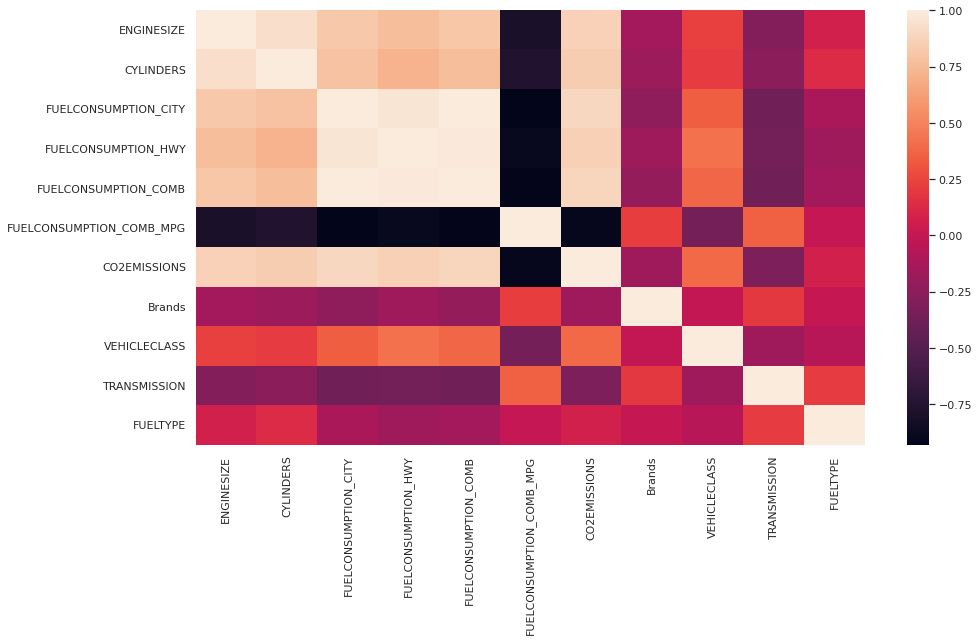

In [30]:
#Visualizing the correlation between the features:
sns.heatmap(df.corr())

In [32]:
# Adding all features
# split into training and testing sets
x4=df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CYLINDERS','FUELCONSUMPTION_COMB_MPG','Brands', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']].values
y4=df['CO2EMISSIONS'].values

# Trying to find the best degree (Polynomial Regression)
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x4)

x_train4, x_test4, y_train4, y_test4 = train_test_split(x_poly, y4, random_state=1)

new_model = linear_model.LinearRegression()
new_model.fit(x_train4,y_train4)

print("A0 = ",new_model.intercept_)
#print("A1 = ",new_model.coef_)

# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(new_model, x_train4, y_train4, x_test4, y_test4, loss='mse', num_rounds=4, random_seed=43)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = new_model.predict(x_test4)
MSE = mean_squared_error(y_test4,y_pred)
print('mean_squared_error',MSE)
RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)
r_score = r2_score(y_test4,y_pred)
print('r_score',r_score)
MAE= mean_absolute_error(y_test4,y_pred)
print('mean_absolute_error',MAE)

#Relatively high bias and variance

A0 =  1020.539231670298
Average Expected Loss: 113.1162
Average Bias: 97.277
Average Variance: 15.8393
mean_squared_error 133.85790663796377
Root_mean_squared_error 11.56969777643149
r_score 0.9679610106260135
mean_absolute_error 6.8115283100544906


In [33]:
# Adding all features
# split into training and testing sets
x4=df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CYLINDERS','FUELCONSUMPTION_COMB_MPG','Brands', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']].values
y4=df['CO2EMISSIONS'].values

# Trying to find the best degree (Polynomial Regression)
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x4)

x_train4, x_test4, y_train4, y_test4 = train_test_split(x_poly, y4, random_state=1)

new_model = linear_model.LinearRegression()
new_model.fit(x_train4,y_train4)

print("A0 = ",new_model.intercept_)
#print("A1 = ",new_model.coef_)

# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(new_model, x_train4, y_train4, x_test4, y_test4, loss='mse', num_rounds=4, random_seed=43)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = new_model.predict(x_test4)
MSE = mean_squared_error(y_test4,y_pred)
print('mean_squared_error',MSE)
RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)
r_score = r2_score(y_test4,y_pred)
print('r_score',r_score)
MAE= mean_absolute_error(y_test4,y_pred)
print('mean_absolute_error',MAE)

# Best Results obtained at degree 3

A0 =  1555931331.9403317
Average Expected Loss: 12.0048
Average Bias: 9.6769
Average Variance: 2.328
mean_squared_error 17.376805219834406
Root_mean_squared_error 4.168549534290603
r_score 0.9958408487643702
mean_absolute_error 1.3240236715108407


## Conclusion
*The best results were obtained after including all features.

*As observed from EDA not all features were fitted through linear regression so third degree polynomial regression was used.

*Best Obtained Model Score:

Average Expected Loss: 12.0048

Average Bias: 9.6769

Average Variance: 2.328

mean_squared_error 17.376805219834406

Root_mean_squared_error 4.168549534290603

r_score 0.9958408487643702

mean_absolute_error 1.3240236715108407


## ----------------------------------------------------------------------------------------------------------------------------------------------------------------